---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 2: Introducción a la modelación numérica </font>**
### **<font color="DodgerBlue"> Notebook 3: Bifurcaciones y estabilidad </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

## **<font color="ForestGreen">  La importancia de la estabilidad </font>**

 La estabilidad se refiere a la capacidad de un método numérico para producir resultados precisos y confiables que se mantengan dentro de ciertos límites razonables frente a pequeñas variaciones en las condiciones iniciales o en los parámetros del sistema.
Es fundamental analizar y comprender la estabilidad de las soluciones numéricas de una ecuación diferencial debido a que estas soluciones constituyen la base de la simulación y predicción de una amplia gama de fenómenos en diversos campos científicos y de ingeniería. En el contexto de las ecuaciones diferenciales, la estabilidad asegura que las soluciones numéricas no se desvíen significativamente de las soluciones exactas a medida que se avanza en el tiempo o se resuelve el problema en cuestión.

La importancia de comprender la estabilidad de las soluciones numéricas se magnifica aún más en la modelación de fenómenos de Ciencias de la Tierra. Los sistemas terrestres son inherentemente complejos y están influenciados por una multitud de variables interrelacionadas, desde procesos atmosféricos y oceanográficos hasta interacciones geológicas y biológicas. La precisión en la simulación de estos fenómenos es crítica para comprender y prever eventos como el cambio climático, la variabilidad climática, la evolución del paisaje, la actividad sísmica, entre otros.

En este notebook vamos a analizar dos diferentes situaciones donde las soluciones a una ecuación o a un sistema de ecuaciones se pueden volver inestables. 

### **<font color="ForestGreen">  Oscilaciones inerciales </font>**


Un movimiento ($U,V$) periódico en el que la inercia del fluido está balanceada únicamente por la fuerza de Coriolis ($f$). Los movimientos de las parcelas de fluido son principalmente horizontales y se vuelven circulares debido a la fuerza de Coriolis variando como función de la latitud. 

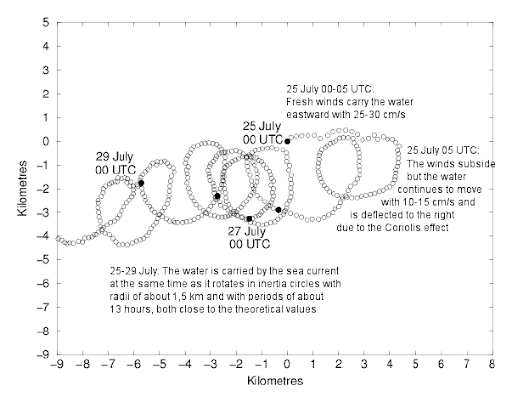

Las ecuaciones que describen a este sistema son simplificaciones de las ecuaciones de Navier-Stokes bajo ciertas suposiciones que no son relevantes para este curso.

\begin{align}
\frac{du}{dt}-fv=0
\end{align}

\begin{align}
\frac{dv}{dt}+fu=0
\end{align}

donde $u(t)$ es la velocidad horizontal del flujo, $v(t)$ es la velocidad meridional del flujo y $f$ es la frecuencia de la oscilación ($\omega$ en notación de ondas) que en este caso es el parámetro de Coriolis (s$^{-1}$). 

En este notebook procedemos a resolver estas ecuaciones con el método de Runge Kutta de 4 orden y el método de diferencias finitas. 

### Oscilaciones inerciales

- Simplificación de las ecuaciones de movimiento
- Flujo acelerado por Coriolis
- (Ecuaciones de arriba)

In [2]:
def oscilaciones_inerciales(t, y, f):
    # Definición de las ecuaciones de dinámica de fluidos geofísicos para la oscilación inercial
    u, v = y
    du_dt = +f * v
    dv_dt = -f * u
    return np.array([du_dt, dv_dt])

# Método de Runge-Kutta de cuarto orden (RK4)
def rk4_step(t, y, f, dt):
    # t paso de tiempo 
    # y es el estado del sistema actual
    # f frecuencia de Coriolis
    k1 = dt * oscilaciones_inerciales(t, y, f)
    k2 = dt * oscilaciones_inerciales(t + 0.5 * dt, y + 0.5 * k1, f)
    k3 = dt * oscilaciones_inerciales(t + 0.5 * dt, y + 0.5 * k2, f)
    k4 = dt * oscilaciones_inerciales(t + dt, y + k3, f)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
def diferencia_finita(init_0,N,f,dt):
    x_values = np.zeros(N)
    y_values = np.zeros(N)
    # Condiciones iniciales
    x_values[0] = init_0[0]
    y_values[0] = init_0[1]
    # Método de diferencias finitas hacia adelante
    for i in range(N-1):
        state=x_values[i],y_values[i]
        solution=oscilaciones_inerciales(t,state,f)
        x_values[i+1] = x_values[i] + dt *solution[0]
        y_values[i+1] = y_values[i] + dt *solution[1]
    return np.asarray(x_values),np.asarray(y_values)

Primero, mostramos la solución utilizando el método de Runge Kutta. 

Los parámetros de esta primer simulación son: frecuencia o parámetro de Coriolis $f=1$ y condiciones iniciales $U_0=1$, $V_0=0$. Las condiciones iniciales las tenemos que guardar en la variable `y0` para poder utilizar en el método de RK45 como está escrito. La ecuación la resolvemos para $t$ en el intervalo $[0,10]$.

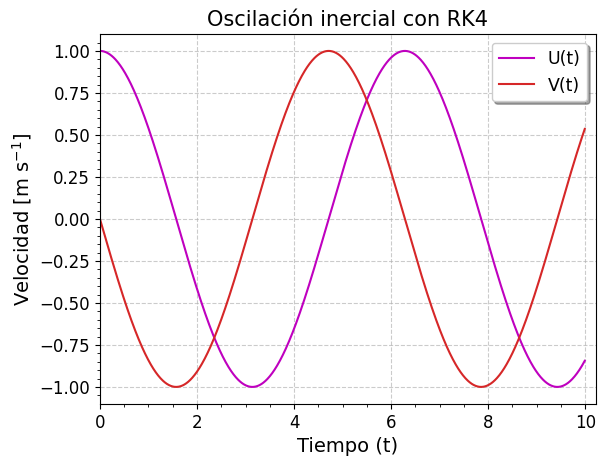

In [3]:
# Parámetros iniciales
f = 1.0  # Frecuencia de la oscilación inercial
dt = 0.01  # Paso de tiempo
t_max = 10.0  # Tiempo máximo de simulación
y0 = np.array([1.0, 0.0])  # Condiciones iniciales [u, v]

# Simulación
t_values = np.arange(0, t_max, dt)
u_values = np.zeros_like(t_values) #es la solución que se grafica
v_values = np.zeros_like(t_values) #es la solución en cada instante

y = y0
for i, t in enumerate(t_values):
    u_values[i] = y[0]
    v_values[i] = y[1]
    y = rk4_step(t, y, f, dt)

# Visualización de los resultados
plt.plot(t_values, u_values, label='U(t)',c='m')
plt.plot(t_values, v_values, label='V(t)',c='tab:red')
lineplot_setup(0,10.22,'Tiempo (t)','Velocidad [m s$^{-1}$]',title='Oscilación inercial con RK4',legend=True)

Luego, mostramos el resultado con el método de diferencias finitas. 

<div class="alert alert-block alert-info">
<b>Nota:</b> El método que escogemos requiere que el código se vea sustancialmente diferente. Es decir, los algoritmos de Runge-Kutta requieren de cierta formulación y un código que se acople a esa formulación y el de diferencias finitas también. Esto, forzosamente quiere decir que hay que programarlos y utilizarlos con ligeras diferencias. 
</div>

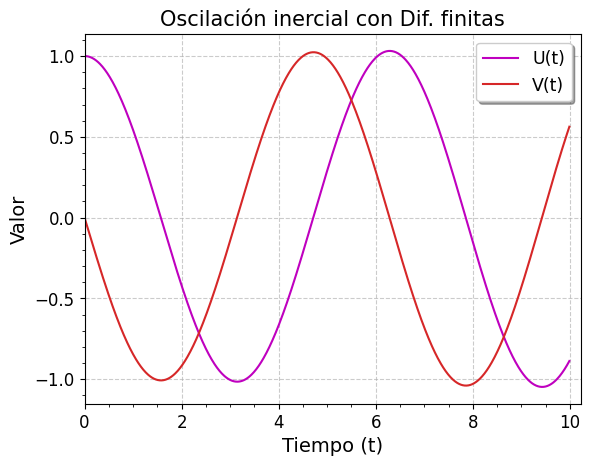

In [4]:
U,V=diferencia_finita(y0,int(t_max/dt),f,dt)
# Visualización de los resultados
plt.plot(t_values, U, label='U(t)',c='m')
plt.plot(t_values, V, label='V(t)',c='tab:red')
lineplot_setup(0,10.22,'Tiempo (t)','Valor',title='Oscilación inercial con Dif. finitas',legend=True)

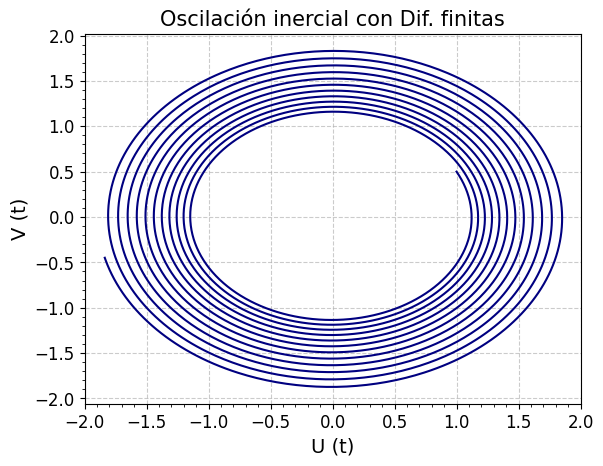

In [5]:
dt = 0.01  # Paso de tiempo
t_max = 50.0  # Tiempo máximo de simulación
y0 = np.array([1.0, 0.5])  # Condiciones iniciales [u, v]
f=1.45
# Simulación
t_values = np.arange(0, t_max, dt)
U,V=diferencia_finita(y0,int(t_max/dt),f,dt)
plt.plot( U, V, c='navy')
lineplot_setup(-2.,2,'U (t)','V (t)',title='Oscilación inercial con Dif. finitas',legend=False)

Hay diferentes criterios de estabilidad dependiendo del tipo de método numérico y de la ecuación diferencial que se esté resolviendo. Aquí, nos centraremos en dos tipos de errores numéricos que llevan a soluciones inestables. Estas soluciones inestables son aquellas que se alejan sustancialmente de la solución verdadera. 

En el siguiente ejemplo, veremos cómo la resolución o el paso de tiempo es una cuestión fundamental para las soluciones numéricas. 

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> Vamos a repetir la primer solución de las soluciones inerciales pero para diferentes valores del paso de tiempo. Es decir, para una frecuencia $f=1$ y condiciones iniciales $U_0=1$, $V_0=0$, resolvemos el sistema con RK45 para los siguientes saltos de tiempo. 
    
<font color="DarkRed"> a) $dt=0.001$.
    
<font color="DarkRed"> b) $dt=0.5$
    
<font color="DarkRed">  c) $dt=0.95$
    
<font color="DarkRed">  c) $dt=1.5$
</font>

---

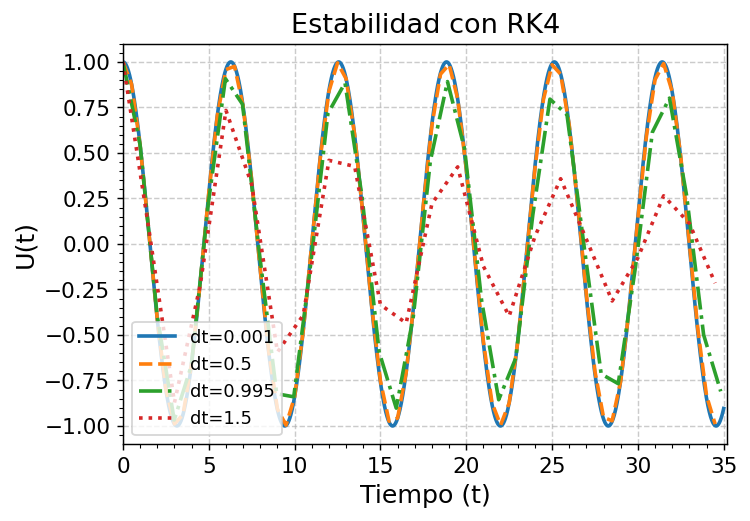

In [6]:
dt_values = [0.001,  0.5,0.995,1.5] # Lista de valores de dt
y0 = np.array([1.0, 0.0])  # Condiciones iniciales [u, v]
t_max=35
f = 1

plt.figure(figsize=(6,4),dpi=130)

# Simulación
for it,dt in enumerate(dt_values):
    t_values = np.arange(0, t_max, dt)
    u_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)

    y = y0
    for i, t in enumerate(t_values):
        u_values[i] = y[0]
        v_values[i] = y[1]
        y = rk4_step(t, y, f, dt)

    # Verificar estabilidad
    plt.plot(t_values, u_values, label=f'dt={dt}',linewidth=2,linestyle=['-','--','-.',':'][it])
lineplot_setup(0,35.22,'Tiempo (t)','U(t)',title='Estabilidad con RK4',legend=True)
plt.legend(loc = 'lower left')

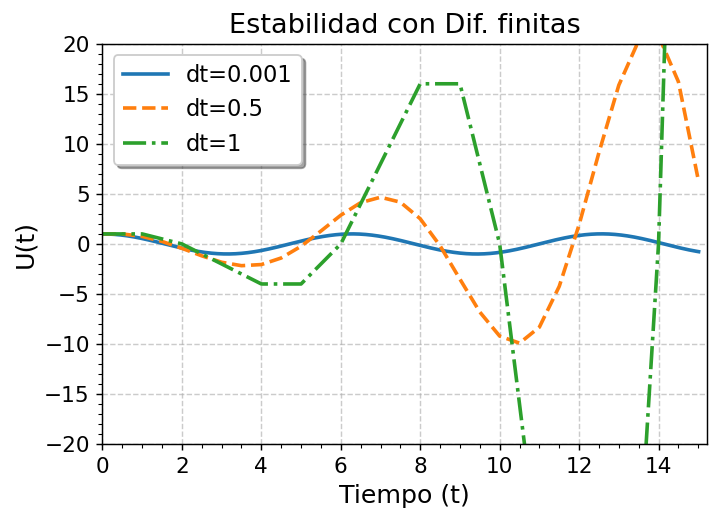

In [7]:
# Análisis de estabilidad 
dt_values = [0.001,  0.5,1]  # Lista de valores de dt
y0 = np.array([1.0, 0.0])  # Condiciones iniciales [u, v]
t_max=15.01
# Simulación

plt.figure(figsize=(6,4),dpi=130)
for it,dt in enumerate(dt_values):
    t_values = np.arange(0, t_max, dt)
    U,V=diferencia_finita(y0,math.ceil(t_max/dt),f,dt)
    # Verificar estabilidad
    plt.plot(t_values, U, label=f'dt={dt}',linestyle=['-','--','-.',':'][it],linewidth=2)
lineplot_setup(0,15.22,'Tiempo (t)','U(t)',ymin=-20,ymax=20,title='Estabilidad con Dif. finitas',legend=True)


En los ejemplos anteriores vemos que en el método de Runge Kutta las soluciones convergen a la solución real para $dt<<1$ pero conforme $dt$ se acerca a 1, la solución empieza a atenuarse y tender a 0. Esto quiere decir que la solución diverge de la solución real. 

En el caso de las diferencias finitas, la divergencia ocurre para pasos de tiempo más pequeños y de manera más abrupta ya que las soluciones explotan y divergen hacia el infinito rápidamente. 

Esto quiere decir que para cada método y ecuación diferencial existe un intervalo de pasos de tiempos **estables** (absolutamente estables) y otro rango con pasos de tiempo **inestables** (donde la solución no converge). 

Una manera de caracterizar estos dominios es graficando la solución final después de cierto tiempo de simulación como función del paso de tiempo. 

En la siguiente celda, evaluamos la solución para la velocidad horizontal del viento $U(t)$, obteniendo sólo el último punto de la solución cuando corremos la solución hasta 15 segundos `t_max=15`. Queremos entonces saber en qué punto se equilibra la solución... o no. 

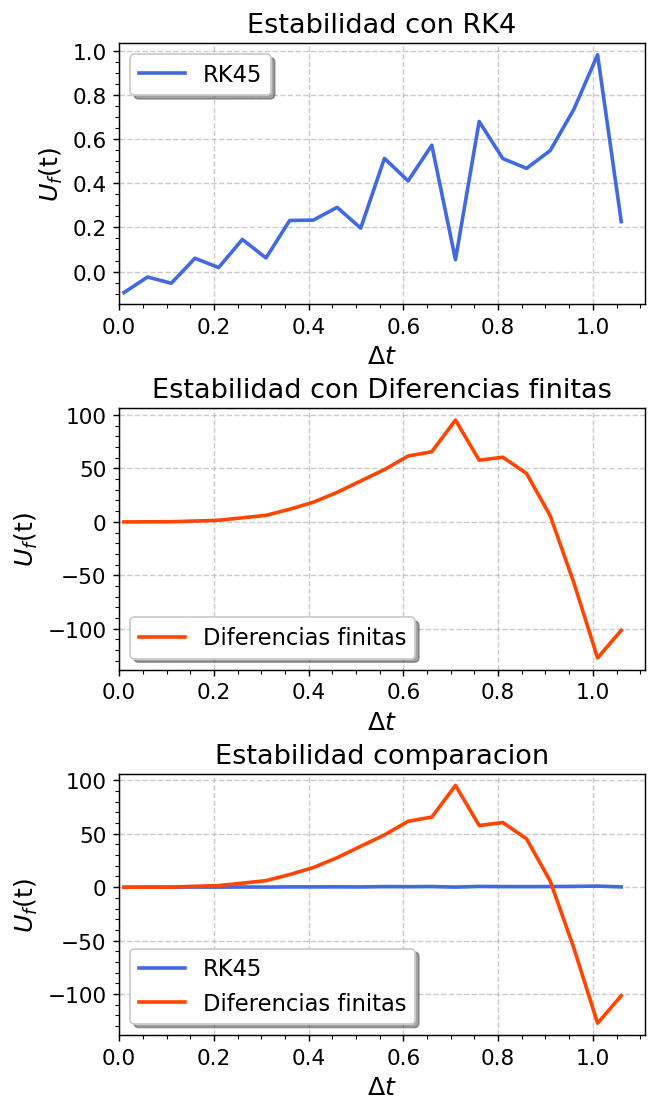

In [8]:
dt_values = np.arange(0.01,1.11,0.05) # Lista de valores de dt
y0 = np.array([1.0, 1.0])  # Condiciones iniciales [u, v]
t_max=15
f=1
# Simulación
rk_sol=[]
dif_sol=[]
#resolvemos RK45 y dif finitas al mismo tiempo
for it,dt in enumerate(dt_values):
    t_values = np.arange(0, t_max, dt)
    u_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    U,V=diferencia_finita(y0,math.ceil(t_max/dt),f,dt)
    # Verificar estabilidad
    dif_sol.append(U[-1])
    y = y0
    for i, t in enumerate(t_values):
        u_values[i] = y[0]
        v_values[i] = y[1]
        y = rk4_step(t, y, f, dt)
    rk_sol.append(u_values[-1])
    
# Graficar soluciones
plt.figure(figsize=(5,8.5),dpi=130)
plt.subplot(311)
plt.plot(dt_values, rk_sol, label='RK45',linewidth=2,c='royalblue')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad con RK4',legend=True)

plt.subplot(312)
plt.plot(dt_values, dif_sol, label='Diferencias finitas',linewidth=2,c='orangered')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad con Diferencias finitas',legend=True)

plt.subplot(313)
plt.plot(dt_values, rk_sol, label='RK45',linewidth=2,c='royalblue')
plt.plot(dt_values, dif_sol, label='Diferencias finitas',linewidth=2,c='orangered')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad comparacion',legend=True)

plt.tight_layout(h_pad=0.5,pad=0.5)

En esta gráfica vemos que la solución más estable es con RK45 ya que podemos obtener soluciones convergentes para $\Delta t <0.5$ pero esto no sucede para las diferencias finitas que ya desde $\Delta t >0.4$ empieza a crecer los valores de la solución llegando a valores que no son físicamente realistas. 

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 10 - Estabilidad de oscilaciones inerciales </font>**

<font color="DarkBlue"> 1. Repita el análisis de estabilidad anterior pero modificando dos cosas. Primero, considere las condiciones iniciales $U_0=3$ y $V_0=2$ y luego modifique $f$ a un valor de 4 s$^{-1}$. Considere el mismo intervalo de tiempo para la solución y el mismo arreglo de valores posibles para el paso de tiempo $dt$. 
    
<font color="DarkBlue"> 2. Grafique sus resultados para la solución con los dos métodos como en el ejemplo anterior. En este caso haga un diagrama multipanel de 6 figuras (3 filas, 2 columnas) donde la primer columna será idéntica al ejemplo anterior pero con sus nuevos parámetros. La segunda columna será casi idéntica  a la primera pero en ella se compararán los resultados para el ejemplo contra el ejercicio. Es decir, la gráfica de la segunda columna, primer fila, tendrá 2 líneas una para el ejemplo, otra para el ejercicio para el método de RK45 mientras que la tercer fila, segunda columna tendrá 4 líneas. 
    
<font color="DarkBlue"> 3. Explique sus resultados, si es que puede. Si no puede, escriba ''no puedo pero le debo un snickers al profe si me apunta en el pizarrón que ya terminé''. 
    
---

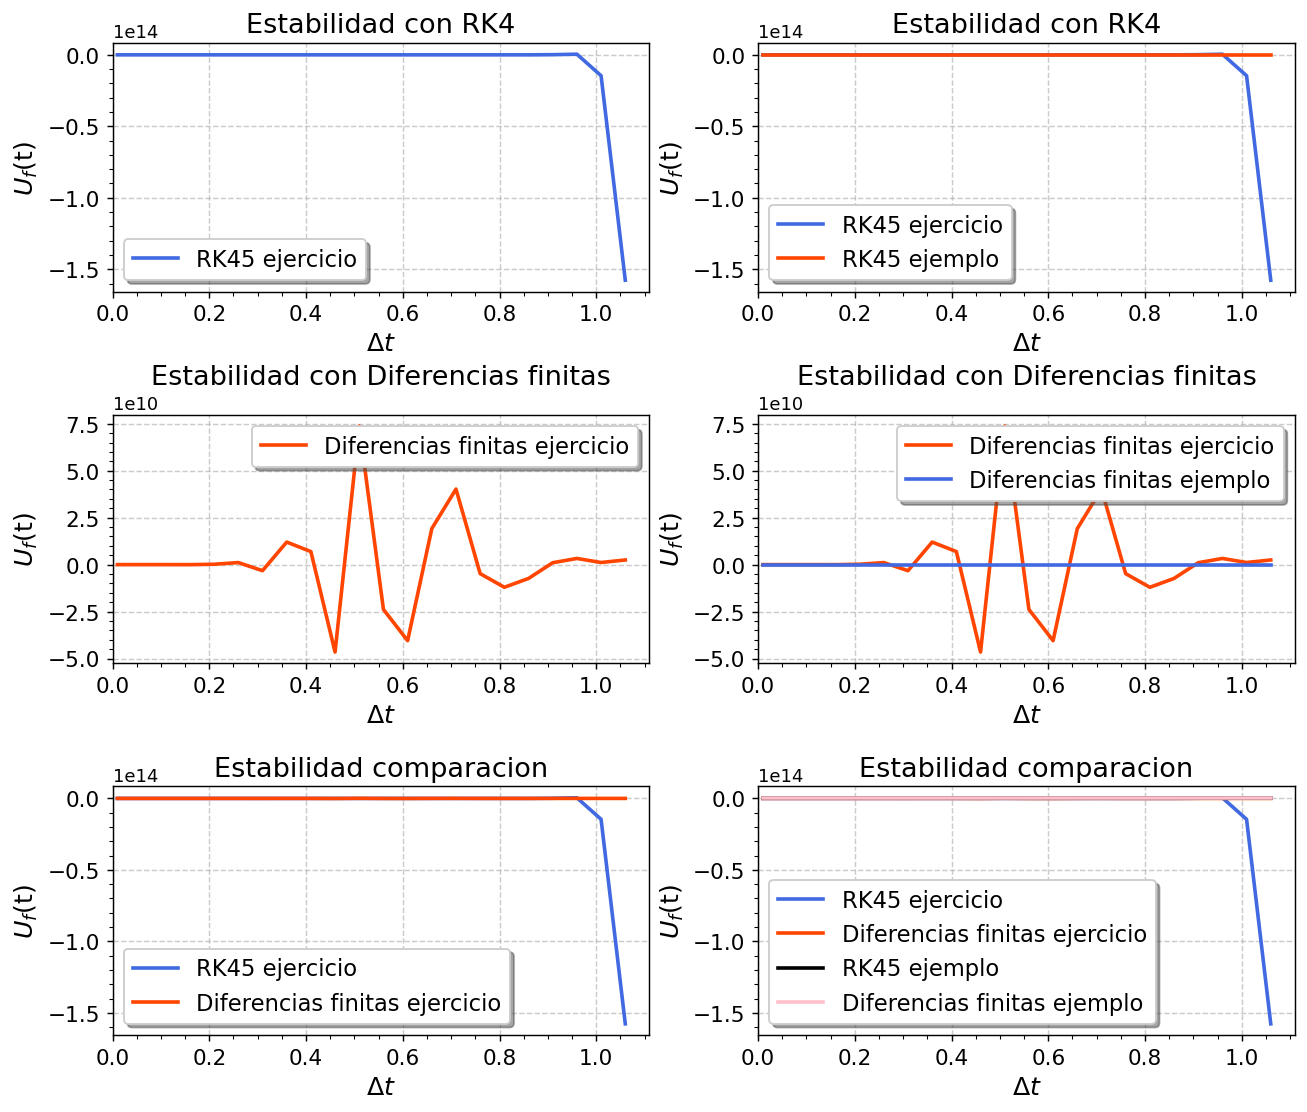

In [19]:
dt_values = np.arange(0.01,1.11,0.05)
y0_2 = np.array([3.0, 2.0])  # Condiciones iniciales [u, v]
t_max=15
f2 = 4

# Simulación
rk_sol2=[]
dif_sol2=[]
y2 = y0_2
#resolvemos RK45 y dif finitas al mismo tiempo
for it,dt in enumerate(dt_values):
    t_values2 = np.arange(0, t_max, dt)
    u_values2 = np.zeros_like(t_values2)
    v_values2 = np.zeros_like(t_values2)
    U2,V2=diferencia_finita(y0_2,math.ceil(t_max/dt),f2,dt)
    # Verificar estabilidad
    dif_sol2.append(U2[-1])

    y2 = y0_2
    for i, t in enumerate(t_values2):
        u_values2[i] = y2[0]
        v_values2[i] = y2[1]
        y2 = rk4_step(t, y2, f2, dt)
    rk_sol2.append(u_values2[-1])
    
# Graficar soluciones
plt.figure(figsize=(10,8.5),dpi=130)
plt.subplot(3,2,1)
plt.plot(dt_values, rk_sol2, label='RK45 ejercicio',linewidth=2,c='royalblue')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad con RK4',legend=True)

plt.subplot(3,2,3)
plt.plot(dt_values, dif_sol2, label='Diferencias finitas ejercicio',linewidth=2,c='orangered')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad con Diferencias finitas',legend=True)

plt.subplot(3,2,5)
plt.plot(dt_values, rk_sol2, label='RK45 ejercicio',linewidth=2,c='royalblue')
plt.plot(dt_values, dif_sol2, label='Diferencias finitas ejercicio',linewidth=2,c='orangered')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad comparacion',legend=True)

#ejercicio clase
plt.subplot(3,2,2)
plt.plot(dt_values, rk_sol2, label='RK45 ejercicio',linewidth=2,c='royalblue')
plt.plot(dt_values, rk_sol, label='RK45 ejemplo',linewidth=2,c='orangered')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad con RK4',legend=True)

plt.subplot(3,2,4)
plt.plot(dt_values, dif_sol2, label='Diferencias finitas ejercicio',linewidth=2,c='orangered')
plt.plot(dt_values, dif_sol, label='Diferencias finitas ejemplo',linewidth=2,c='royalblue')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad con Diferencias finitas',legend=True)

plt.subplot(3,2,6)
plt.plot(dt_values, rk_sol2, label='RK45 ejercicio',linewidth=2,c='royalblue')
plt.plot(dt_values, dif_sol2, label='Diferencias finitas ejercicio',linewidth=2,c='orangered')
plt.plot(dt_values, rk_sol, label='RK45 ejemplo',linewidth=2,c='k')
plt.plot(dt_values, dif_sol, label='Diferencias finitas ejemplo',linewidth=2,c='pink')
lineplot_setup(0,1.11,'$\Delta t$','$U_f$(t)',title='Estabilidad comparacion',legend=True)

plt.tight_layout(h_pad=0.5,pad=0.5)

Como vimos en clase, entre Runge-Kutta y diferencias finitas, la primera es más acertada y precisa que la de diferencias finitas. Esto mismo se ve en nuestro ejercicio, ya que la de RK explota hasta 1e14. mientras que la de dif. finitas 

### **<font color="ForestGreen">  Inestabilidad por parámetros </font>**

Para ciertas ecuaciones, los parámetros físicos del sistema pueden hacer que un cierto método con un cierto paso de tiempo se vuelva inestable, o no. En este caso, el parámetro $f$ resulta muy importante porque nos dice algo sobre la tasa con la que cambian de dirección las parcelas. Parámetros muy grandes de $f$ pueden generar cambios muy abruptos. Nuestros métodos, al ser aproximaciones, pueden tener problemas con este tipo de valores si nuestro valor de $dt$ no es lo suficientemente pequeño. 

Veamos a qué nos referimos. En este ejemplo $dt$ es constante y de valor 0.1, que no es muy alto ni muy bajo. 

Vamos a iterar sobre un arreglo de 4 valores posibles de $f$, que son [1,10,15,20] y veamos las soluciones con el método de RK45. 

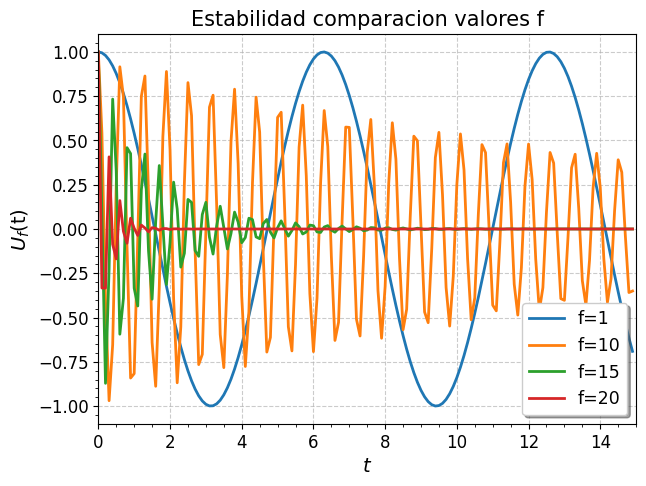

In [9]:
# Análisis de estabilidad 
dt=0.1
f_values=[1,10,15,20]
y0 = np.array([1.0, 0.0])  # Condiciones iniciales [u, v]
t_max=15
# Simulación
t_values = np.arange(0, t_max, dt)

# iteramos sobre valores de f
for f in f_values:

    u_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    
    # resolvemos por rk4
    y = y0
    for i, t in enumerate(t_values):
        u_values[i] = y[0]
        v_values[i] = y[1]
        y = rk4_step(t, y, f, dt)
   
    plt.plot(t_values, u_values, label=f'f='+str(f),linewidth=2)
lineplot_setup(0,15,'$t$','$U_f$(t)',title='Estabilidad comparacion valores f',legend=True)
plt.tight_layout(h_pad=0.5,pad=0.5)

#f grande gira muy rapido que la sol. numerica no se acopla

Vemos que efectivamente para ciertos valores de $f$ la solución se comporta bien, pero para otros, la solución explota. 

Ahora queremos comparar los métodos de Runge-Kutta con el de diferencias finitas para diferentes valores de $f$. Específicamente vamos a evaluar el parámetro $f\Delta t$, ahora veremos por qué para los dos métodos. 

El intervalo de tiempo, las condiciones iniciales y el algoritmo del método de solución son exactamente iguales. 

<div class="alert alert-block alert-info">
<b>Nota:</b> Queremos comparar los resultados al final de la simulación, no las soluciones como funciones del tiempo. Entonces fíjense bien que en el código siguiente estamos extrayendo los últimos valores del vector de solución para cada método. En este caso, sólo vamos a ver a la solución de la velocidad horizontal $U$.
</div>

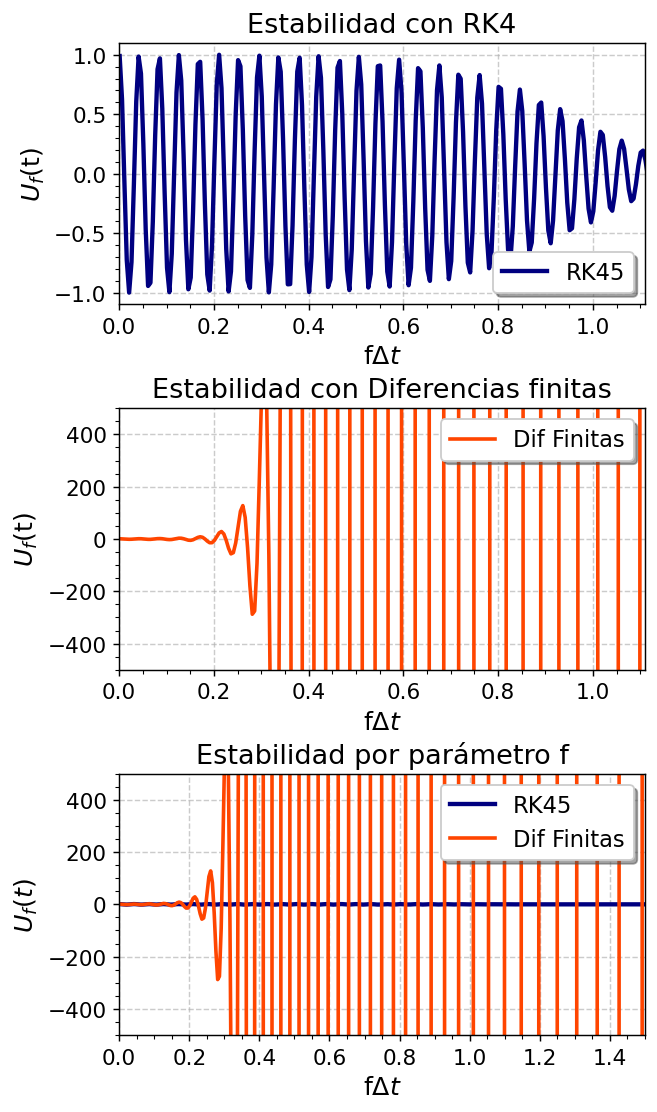

In [10]:
# condiciones del modelo
dt=0.1

# definimos nuestro vector de $f$ a considerar
f_values=np.arange(0.01,15,0.05)
y0 = np.array([1.0, 0.0])  # Condiciones iniciales [u, v]
t_max=15
# Simulación
# vector de simulacion
t_values = np.arange(0, t_max, dt)

# listas para guardar las soluciones de ambos metodos
rk_sol=[]
dif_sol=[]

# iteramos por todo el vector de fs
for f in f_values:
    # solucion por dif. finitas
    u_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    U,V=diferencia_finita(y0,math.ceil(t_max/dt),f,dt)
    
    # guardamos la ultima solucion
    dif_sol.append(U[-1])
    y = y0
    
    # Ahora resolvemos con runge-kutta por pasos
    for i, t in enumerate(t_values):
        u_values[i] = y[0]
        v_values[i] = y[1]
        y = rk4_step(t, y, f, dt)
        
    # guardamos la ultima solucion de Runge-Kutta
    rk_sol.append(u_values[-1])
# Verificar estabilidad
# Graficar soluciones
plt.figure(figsize=(5,8.5),dpi=130)
plt.subplot(311)
plt.plot(f_values*dt, rk_sol,c='navy',label='RK45',linewidth=2.4)
lineplot_setup(0,1.11,'f$\Delta t$','$U_f$(t)',title='Estabilidad con RK4',legend=True)
plt.subplot(312)
plt.plot(f_values*dt, dif_sol,c='orangered',linewidth=2,label='Dif Finitas')
lineplot_setup(0,1.11,'f$\Delta t$','$U_f$(t)',ymin=-500.1,ymax=500.1,title='Estabilidad con Diferencias finitas',legend=True)
plt.subplot(313)
plt.plot(f_values*dt, rk_sol,c='navy',label='RK45',linewidth=2.4)
plt.plot(f_values*dt, dif_sol,c='orangered',linewidth=2,label='Dif Finitas')
lineplot_setup(0,1.11,'f$\Delta t$','$U_f$(t)',title='Estabilidad comparacion',legend=True)
plt.tight_layout(h_pad=0.5,pad=0.5)
lineplot_setup(0,1.5,'f$\Delta t$','$U_f(t)$',ymin=-500.1,ymax=500.1,title='Estabilidad por parámetro f',legend=True)


En la gráfica anterior observamos que conforme el parámetro $f\Delta t$ crece, las soluciones empiezan a tomar valores diferentes y conforme se acercan a 0.5 en el caso de RK45 y 0.2 en el caso de las diferencias finitas, empiezan a dejar de oscilar y cambian radicalmente. La solución de RK45 empieza a comprimirse y tender a 0, como vimos que sucede en la gráfica anterior. Mientras que la solución por diferencias finitas comienza a crecer alrededor de $f\Delta t=0.2$ de una manera patológica. 

Los resultados anteriores nos muestran que este parámetro $f\Delta t$ es un parámetro útil para evaluar la estabilidad de las oscilaciones inerciales. Este parámetro nos relaciona el parámetro físico $f$ y el parámetro numérico $\Delta t$. Para cierta velocidad de fase de la solución podemos calcular qué valor del intervalo de tiempo necesitamos para que nuestra solución no explote. Es decir, la resolución con la que resolvemos nuestra ecuación diferencial **depende de los parámetros físicos que utilizemos**. 

#### **<font color="ForestGreen">  Contexto en modelos globales </font>**

En el contexto de los modelos numéricos globales, donde se simulan fenómenos que abarcan grandes escalas espaciales y temporales, es fundamental mantener un equilibrio entre la resolución espacial y temporal para garantizar la precisión y la estabilidad del modelo. Esto se debe a que, al aumentar la resolución espacial (es decir, reducir el tamaño de los elementos de malla), se introducen más detalles y se capturan mejor los procesos físicos locales. Sin embargo, esto también puede aumentar el costo computacional al requerir una resolución temporal más fina para capturar los cambios rápidos en el sistema.

Hay un criterio que nos dice cuánto aumentar la resolución temporal al aumentar la resolución espacial y se conoce como el "criterio de estabilidad de _Courant-Friedrichs-Lewy_" (CFL). Este criterio establece una relación entre el tamaño del paso de tiempo, el tamaño de la malla espacial y la velocidad característica del sistema. La idea básica es que el paso de tiempo debe ser lo suficientemente pequeño para permitir que la información se propague a través de una distancia espacial típica dentro de un solo paso de tiempo.

El criterio de estabilidad CFL se puede expresar matemáticamente de la siguiente manera:

\begin{align}
\Delta t\leq \frac{\Delta x}{c}
\end{align}

Donde:

- $\Delta t$ es el paso de tiempo,
- $\Delta x$ es el tamaño del paso espacial,
- $\Delta c$ es la velocidad característica del sistema.

Este criterio nos dice que el paso de tiempo debe ser menor o igual que el cociente entre el tamaño del paso espacial y la velocidad característica del sistema. Si el paso de tiempo es demasiado grande en comparación con el tamaño del paso espacial y la velocidad característica, pueden ocurrir inestabilidades numéricas que comprometen la precisión y la estabilidad del modelo.

En resumen, al aumentar la resolución espacial en modelos globales, es necesario aumentar la resolución temporal para mantener la estabilidad numérica y garantizar resultados precisos y confiables.

### **<font color="ForestGreen">  Bifurcación y estabilidad de la parametrización de Budyko </font>**

La clase pasada vimos que Budyko quiso definir a su parametrización de albedo como:

\begin{align}
    \alpha_\lambda(T)=
    \begin{cases}
      \alpha_1 & \text{if } T < T_1 \\
      \alpha_1+\frac{(\alpha_2-\alpha_1)[T-T_1]}{(T_2-T_1)} & \text{if } T_1\leq T \leq T_2\\
      \alpha_2 & \text{if } T > T_2\\
    \end{cases}
\end{align}

que es una función por pedazos. Resolviendo el modelo nos empezamos a dar cuenta de que con sus condiciones pre-establecidas que le pusimos nosotros, las soluciones sólo parecían tener dos estados: congelado o no congelado. 
Hielo o mar abierto. 

En el ejercicio 7, ustedes demostraron que si modificamos los valores de los parámetros de albedo y temperaturas $T_1$ y $T_2$ podíamos llegar a soluciones más suaves o más abruptas de la temperatura como función de la latitud. 

En este notebook, vamos a regresar a la parametrización del albedo. Es el mimsmo código pero utilizamos valores de los parámetros ligeramente diferentes a los originales para empezar:


\begin{align}
\alpha_1=0.7\,,\,T_1= -10 ^\circ C
\end{align}

\begin{align}
\alpha_2=0.25\,,\,T_2= 10 ^\circ C
\end{align}

In [11]:
def alpha_T(T,T1,T2,alpha1,alpha2):
    # funcion alpha segun Budyko
    # T es variable obligatoria (en grados Celsius) y las demas opcionales
    # condiciones
    # condicion de hielo
    if T<T1:
        alpha=alpha1
    # condicion de agua liquida
    elif T>T2:
        alpha=alpha2
    # condicion intermedia
    else:
        alpha=alpha1+(alpha2-alpha1)*(T-T1)/(T2-T1)
    return alpha

def balance(Qbar,epsilon,Ti,T1,T2,alpha1,alpha2):
    # radiacion entrante
    incoming=Qbar*(1-alpha_T(Ti-273.15,T1,T2,alpha1,alpha2))#/4.
     #radiacion saliente
    outgoing=epsilon*sigma*(Ti**4)#*(1/(2**(1/4)))
    #print(incoming,outgoing)
    return incoming-outgoing

def solve_T(T0,Q,dt,years_to_solve=50,T1=-10,T2=10,alpha1=0.7,alpha2=0.25):
    times=np.arange(0,years_to_solve*dt,dt)
    T=np.zeros(len(times))
    for it,ti in enumerate(times):
        if it==0:
            T[it]=T0
        else:
            T[it] = T[it-1] + dt / C * balance(Q,epsilon,T[it-1],T1,T2,alpha1,alpha2)
    return times,T


Ahora iniciamos nuestras constantes y parámetros del modelo de Budyko, tal como le hicimos la clase pasada. Si tiene dudas en algo, pregunte o regrese al notebook anterior. 

Corremos el modelo para el mismo aqua planeta con un $\epsilon$ de $0.8$ y para una insolación bastante alta de 450 W m$^{-2}$.

In [12]:
# inicio de tiempo y vectores
dt = 60. * 60. * 24. * 365.
c_w = 4e3  #  capacidad específica del agua  J/kg/K
rho_w = 1e3  #  Densidad del agua kg/m3
epsilon=0.8
sigma=5.67e-8
H = 100.   #  Profundidad del agua m
C = c_w * rho_w * H   #  Heat capacity of the model 
# insolacion prueba
Q=450

Ahora vamos a repetir el ejercicio 6 del notebook 3.2, pero ahora utilizando un arreglo de temperaturas iniciales. Específicamente, queremos ver todo lo que se encuentra cerca del agua-hielo. 

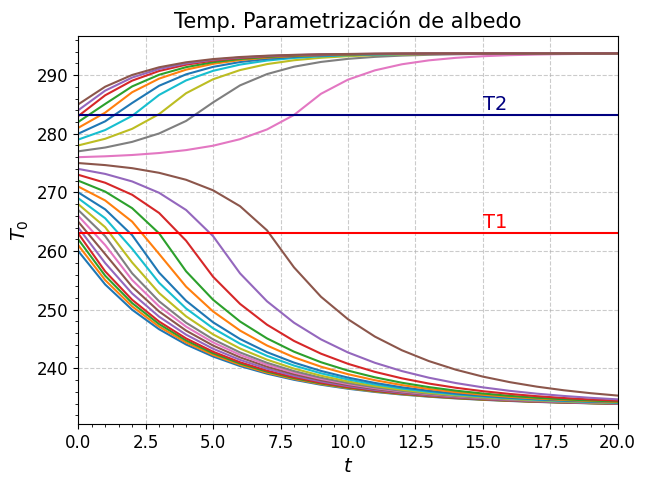

In [13]:
# vector de temperaturas iniciales
T0s=np.arange(260,286,1)
# iniciamos el vector de temperatura solucion
T_eq=np.zeros(len(T0s))

for i_T0,T0 in enumerate(T0s):
    # resolvemos la EDO en cada T0, para la misma Q
    t,T_eq=solve_T(T0,Q,dt)
    plt.plot(t/dt,T_eq)
# linea horizontal para la T1 de la parametrizacion
plt.axhline(263.15,c='red')
# linea horizontal para la T1 de la parametrizacion
plt.axhline(283.15,c='navy')
# anotar el texto
plt.text(15,284,'T2',fontsize=14,c='navy')
plt.text(15,264,'T1',fontsize=14,c='red')
lineplot_setup(0,20,'$t$','$T_0$',title='Temp. Parametrización de albedo')
plt.tight_layout(h_pad=0.5,pad=0.5)


Vemos que el modelo tiene dos equilibrios estables en 255 K y 295 K dependiendo de la temperatura inicial. 
Pero también vemos que simulaciones con temperatura inicial de $T$ tal que $T_1<T<T_2$ terminan en los mismos dos estados de equilibrio. 

1. ¿Por qué sólo hay 2 estados de equilibrio?
2. ¿Es posible tener una solución con una temperatura final en el intervalo $T_1<T<T_2$?


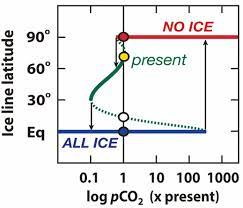

El modelo de Budyko es un modelo con 2 estados de equilibrio y un estado de equilibrio inestable en la zona con agua-hielo. 

Para demostrar este punto de desequilibrio un poco más, vamos a variar los parámetros de albedo reduciendo el intervalo de diferencia entre el albedo del hielo $\alpha_1$ y el del agua líquida $\alpha_2$.

Noten que la gráfica es para un tiempo más prolongado que para la gráfica anterior.

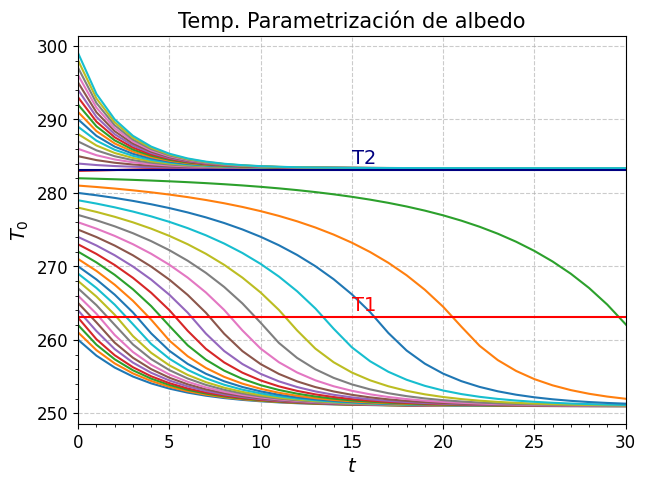

In [14]:
# vector de temperaturas iniciales
T0s=np.arange(260,300,1)
# iniciamos el vector de temperatura solucion
T_eq=np.zeros(len(T0s))

for i_T0,T0 in enumerate(T0s):
    # resolvemos la EDO en cada T0, para la misma Q
    t,T_eq=solve_T(T0,Q,dt,alpha1=0.6,alpha2=0.35)
    plt.plot(t/dt,T_eq)
plt.axhline(263.15,c='red')
plt.axhline(283.15,c='navy')
plt.text(15,284,'T2',fontsize=14,c='navy')
plt.text(15,264,'T1',fontsize=14,c='red')
lineplot_setup(0,30,'$t$','$T_0$',title='Temp. Parametrización de albedo')
plt.tight_layout(h_pad=0.5,pad=0.5)



---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 11 - Diagrama de bifurcación </font>**

<font color="DarkBlue"> 1. Considera la parametrización de albedo y para los valores de $\alpha_1=0.65$ y $\alpha_2=0.33$ utilice 2 pares de valores diferentes de los parámetros de temperatura y resuelva el modelo para el mismo vector de condiciones iniciales que utilizamos en la última celda. 
    
<font color="DarkBlue"> 2. Grafique sus resultados como en los gráficos anteriores en 2 paneles (recuerde que tiene dos gráficos de temperatura). 
    
<font color="DarkBlue"> 3. Resuma, en un párrafo de 2-3 oraciones lo que observa en su gráfico utilizando todo lo que aprendió sobre el modelo de Budyko. Al final escriba una oración más sobre si le gustó o no ver el modelo de Budyko y por qué. 
    
---

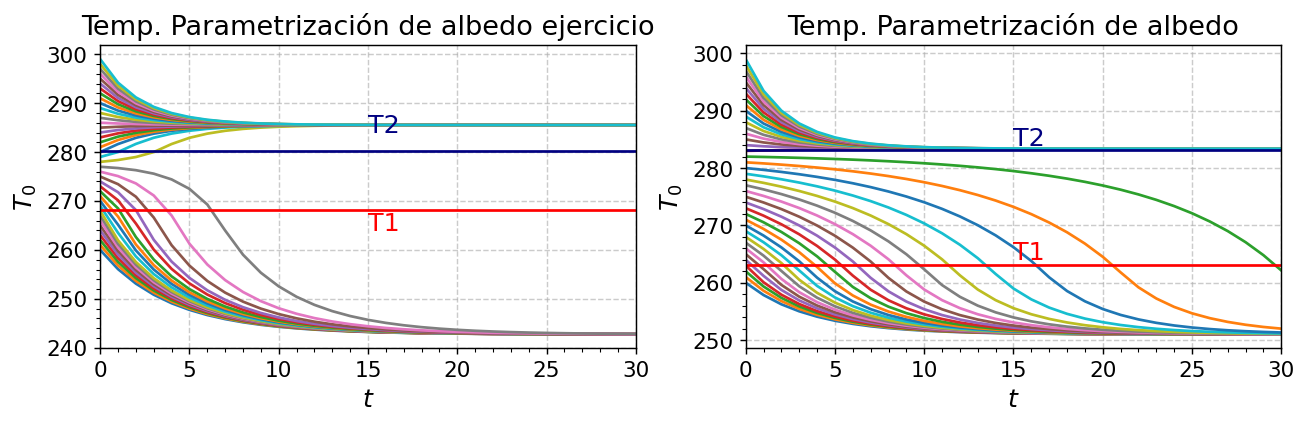

In [34]:
# vector de temperaturas iniciales
T0s=np.arange(260,300,1)
# iniciamos el vector de temperatura solucion
T_eq=np.zeros(len(T0s))

plt.figure(figsize=(10,8.5),dpi=130)
for i_T0,T0 in enumerate(T0s):
    # resolvemos la EDO en cada T0, para la misma Q
    t2,T_eq2=solve_T(T0,Q,dt, T1=-5,T2=7, alpha1=0.65,alpha2=0.33)
    t,T_eq=solve_T(T0,Q,dt,alpha1=0.6,alpha2=0.35)


    plt.subplot(3,2,1)
    plt.plot(t2/dt,T_eq2)
    
    plt.subplot(3,2,2)
    plt.plot(t/dt,T_eq) 

plt.subplot(3,2,1)
plt.axhline(268.15,c='red') #-5°C
plt.axhline(280.15,c='navy') #°7C
plt.text(15,284,'T2',fontsize=14,c='navy')
plt.text(15,264,'T1',fontsize=14,c='red')
lineplot_setup(0,30,'$t$','$T_0$',title='Temp. Parametrización de albedo ejercicio')
plt.tight_layout(h_pad=0.5,pad=0.5)

plt.subplot(3,2,2)
plt.axhline(263.15,c='red')
plt.axhline(283.15,c='navy')
plt.text(15,284,'T2',fontsize=14,c='navy')
plt.text(15,264,'T1',fontsize=14,c='red')
lineplot_setup(0,30,'$t$','$T_0$',title='Temp. Parametrización de albedo')
plt.tight_layout(h_pad=0.5,pad=0.5)

Podemos observar que los nuevos albedos implementados aumentó en la transición a agua líquida y disminuyó para el de hielo. Esto se ve reflejado en la gráfica, ya que se llega más lento y con mayor temperatura al agua líquida; mientras que para el hielo se llega al equilibrio más rápido y a menor temperatura. Todo esto es consistente con el albedo modificado. Además, el cambio de T2 y T1 que se usó fue de -5°C y 7°C, lo que implicó que los valores de agua líquida se alejaran más de los del hielo, ocasionando una mayor estabilidad para ambos estados. Asimismo, para temperaturas cercanas al hielo, el equilibrio es más rápido para una mayor gama de temperaturas. 

El modelo de Budyko fue interesante para modelar la posibilidad de planetas totalmente líquidos, de hielo o de agua-hielo. A pesar de haber sido complejo la parametrización de albedo, notamos que es funcional para visualizar los cambios de temperatura. Sí nos gustó:)

Finalmente, para terminar de una vez por todas con el modelo de Budyko, vamos a mostrar de diferentes maneras cómo los valores de $T$ y la velocidad de cambio de $T$ medida como $\frac{dT}{dt}$. Específicamente evaluar esta tasa de crecimiento en los instantes de tiempo $t_i$ para $i=4$ y su diferencia con el tiempo $i=1$, o sea $T_{i=4}-T_{i=1}$. Este valor específico de tasa de cambio lo queremos porque buscamos evaluar hacia dónde van a crecer nuestras soluciones de temperatura. 
 
 
La función para obtener esta tasa de cambio es la siguiente. 

In [15]:
def solve_T2(T0,Q,dt,years_to_solve=10,T1=-10,T2=10,alpha1=0.6,alpha2=0.3):
    times=np.arange(0,years_to_solve*dt,dt)
    T=np.zeros(len(times))
    for it,ti in enumerate(times):
        if it==0:
            T[it]=T0
        else:
            T[it] = T[it-1] + dt / C * balance(Q,epsilon,T[it-1],T1=T1,T2=T2,alpha1=alpha1,alpha2=alpha2)
    # diferencia de temperatura es lo que queremos
    return T[4]-T[1]

Ahora vamos a hacer unas gráficas. 

Es importante *recalcar* y *resaltar* que en esta sección queremos entender más al modelo de Budyko y las gráficas que se obtienen, no el código que estamos realizando. 

La siguiente celda resuelve el modelo y obtiene los resultados de la tasa de crecimiento de la temperatura con el tiempo para una serie de condiciones de la parametrización del albedo. Es un poco más fácil de interpretar primero la figura y luego regresar un poco al código a tratar de entenderlo. 

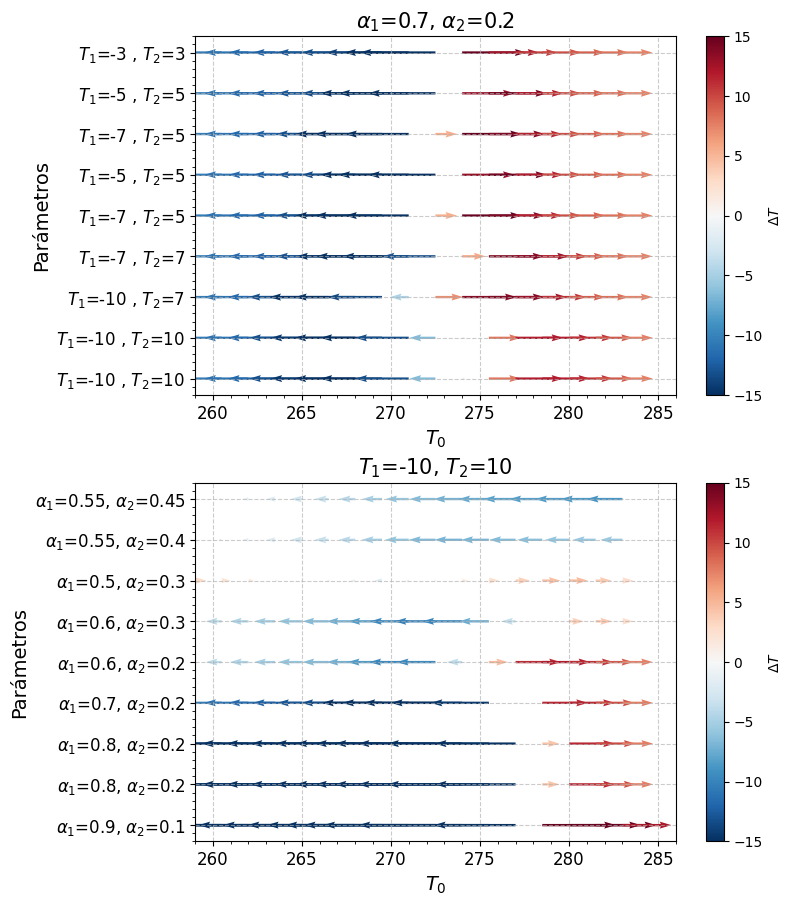

In [16]:
# vector de temperaturas iniciales
T0s=np.arange(259,284,1.5)
# condiciones de la parametrizacion de albedo
conditions=[[-10,10,0.7,0.2],[-10,10,0.7,0.2],[-10,7,0.7,0.2],[-7,7,0.7,0.2],[-7,5,0.7,0.2],[-5,5,0.7,0.2],[-7,5,0.7,0.2],[-5,5,0.7,0.2],[-3,3,0.7,0.2]]
T_eq=np.zeros((len(conditions),len(T0s)))
V=np.zeros((len(conditions),len(T0s)))
labels=[]

for ia,params in enumerate(conditions):
    for i_T0,T0 in enumerate(T0s):
        # resolvemos la EDO en cada T0, para la misma Q
        T_eq[ia,i_T0]=solve_T2(T0,Q,dt,T1=params[0],T2=params[1],alpha1=params[2],alpha2=params[3])
    label=r'$T_1$='+str(params[0])+' , $T_2$='+str(params[1])
    labels.append(label)
X,Y=np.meshgrid(T0s,np.arange(1,len(conditions)+1))
plt.figure(figsize=(8,9))
plt.subplot(211)
plt.quiver(X,Y,T_eq,V,T_eq,cmap='RdBu_r',scale=120,clim=[-15,15])
plt.yticks(np.arange(1,10),labels)
lineplot_setup(259,286,'$T_0$','Parámetros',title=r'$\alpha_1$=0.7, $\alpha_2$=0.2')
cbar=plt.colorbar()
cbar.set_label('$\Delta T$')
conditions=[[-10,10,0.9,0.1],[-10,10,0.8,0.2],[-10,10,0.8,0.2],[-10,10,0.7,0.2],[-10,10,0.6,0.2],[-10,10,0.6,0.3],
            [-10,10,0.5,0.3],[-10,10,0.55,0.4],[-10,10,0.55,0.45]]
T_eq=np.zeros((len(conditions),len(T0s)))
V=np.zeros((len(conditions),len(T0s)))
labels=[]
for ia,params in enumerate(conditions):
    for i_T0,T0 in enumerate(T0s):
        # resolvemos la EDO en cada T0, para la misma Q
        #T_eq[ia,i_T0]=solve_T2(T0,Q,dt,T1=params[0],T2=params[1],alpha1=params[2],alpha2=params[3])
        T_eq[ia,i_T0]=solve_T2(T0,Q,dt,T1=-5,T2=params[1],alpha1=params[2],alpha2=params[3])
    label=r'$\alpha_1$='+str(params[2])+r', $\alpha_2$='+str(params[3])
    labels.append(label)
X,Y=np.meshgrid(T0s,np.arange(1,len(conditions)+1))
plt.subplot(212)
plt.quiver(X,Y,T_eq,V,T_eq,cmap='RdBu_r',scale=120,clim=[-15,15])
plt.yticks(np.arange(1,10),labels)
cbar=plt.colorbar()
cbar.set_label('$\Delta T$')
lineplot_setup(259,286,'$T_0$','Parámetros',title=r'$T_1$=-10, $T_2$=10')
plt.tight_layout(h_pad=0.5,pad=0.5)

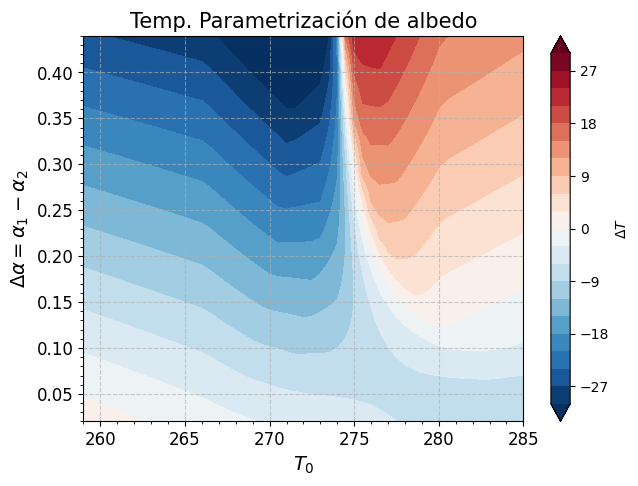

In [17]:
# albedo central a partir del cual vamos a variar alpha
alpha_center=0.5

# temperaturas que se quedaron fijas para la param.
T1=-7
T2=7
# vector de deltas, cuanto variamos alpha
delta_alphas=np.arange(0.02,0.45,0.01)
T0s=np.arange(259,286,0.5)
T_eq=np.zeros((len(delta_alphas),len(T0s)))
for ia,dif_alpha in enumerate(delta_alphas):
    for i_T0,T0 in enumerate(T0s):
        T_eq[ia,i_T0]=solve_T2(T0,Q,dt,T1=T1,T2=T2,alpha1=alpha_center+dif_alpha,alpha2=alpha_center-dif_alpha)
plt.contourf(T0s,delta_alphas,T_eq,cmap='RdBu_r',levels=np.arange(-30,31,3),extend='both')
cbar=plt.colorbar()
cbar.set_label('$\Delta T$')
lineplot_setup(259,285,'$T_0$',r'$\Delta\alpha=\alpha_1-\alpha_2$',title='Temp. Parametrización de albedo')
plt.tight_layout(h_pad=0.5,pad=0.5)

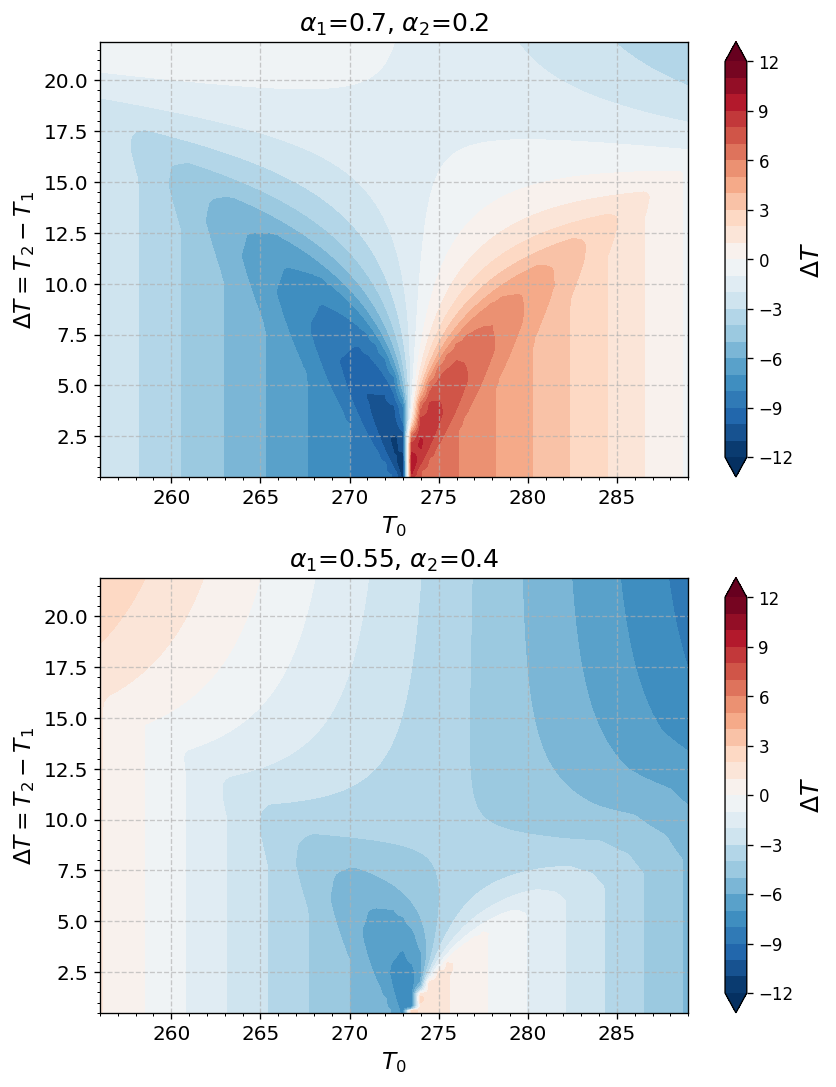

In [18]:
dt = 60. * 60. * 24. * 365.
T_center=0
alpha1=0.6
alpha2=0.3
delta_Ts=np.arange(0.5,22,0.1)
T0s=np.arange(255,290,0.5)
T_eq=np.zeros((len(delta_Ts),len(T0s)))
for ia,dif_T in enumerate(delta_Ts):
    for i_T0,T0 in enumerate(T0s):
        T_eq[ia,i_T0]=solve_T2(T0,Q,dt,T1=T_center-dif_T,T2=T_center+dif_T,alpha1=alpha1,alpha2=alpha2)

plt.figure(figsize=(7,9),dpi=120)
plt.subplot(211)
plt.contourf(T0s,delta_Ts,T_eq,cmap='RdBu_r',levels=np.arange(-12,12.1,1),extend='both')
cbar=plt.colorbar()
cbar.set_label('$\Delta T$',fontsize=15)
lineplot_setup(256,289,'$T_0$',r'$\Delta T =T_2-T_1$',title=r'$\alpha_1$=0.7, $\alpha_2$=0.2')
alpha1=0.55
alpha2=0.4

for ia,dif_T in enumerate(delta_Ts):
    for i_T0,T0 in enumerate(T0s):
        # resolvemos la EDO en cada T0, para la misma Q
        T_eq[ia,i_T0]=solve_T2(T0,Q,dt,T1=T_center-dif_T,T2=T_center+dif_T,alpha1=alpha1,alpha2=alpha2)

plt.subplot(212)
plt.contourf(T0s,delta_Ts,T_eq,cmap='RdBu_r',levels=np.arange(-12,12.1,1),extend='both')
cbar=plt.colorbar()
cbar.set_label('$\Delta T$',fontsize=15)
lineplot_setup(256,289,'$T_0$',r'$\Delta T =T_2-T_1$',title=r'$\alpha_1$=0.55, $\alpha_2$=0.4')
plt.tight_layout(h_pad=0.5,pad=0.5)

En las celdas anteriores buscábamos de alguna manera obtener un gráfico que nos permitiera ver qué sucede con las soluciones para distintos parámetros de albedo o temperatura. 

Vemos que la tendencia de las soluciones a crecer o disminuir su temperatura depende de los parámetros escogidos. Específicamente, dos conclusiones que podemos hacer es que mientras más grande sea la diferencia de albedos más fuerte o rápida es la tendencia de las soluciones a diverger del agua-hielo. Por otro lado, con la temperatura ocurre lo opuesto, mientras más diferentes sean las temperaturas $T_1$ y $T_2$

El resumen es que la parametrización de Budyko tiene 3 estados de equilibrio, dos estables, que son nuestras soluciones congeladas o con agua líquida que ya conocemos y uno más que es inestable. Es decir, salvo para un valor muy particular, todas las soluciones que inician con agua hielo en el intervalo $T_1<T<T_2$ salvo 1 serán inestables y escapan del estado agua-hielo. Esto sucede, como ya hemos repetido, por la retroalimentación del hielo-albedo, o lo que sería más apropiado la retroalimentación de la temperatura y el albedo. En la tarea, buscaremos encontrar a esta temperatura donde ocurre el equilibrio inestable. 

Con esto, damos por concluida la sección del modelo de Budyko.

### **<font color="ForestGreen">  La ecuación logística </font>**

La ecuación logística es un modelo matemático simple pero poderoso que se utiliza ampliamente en la modelación de poblaciones y en la comprensión de la dinámica de sistemas en biología, ecología y otras disciplinas relacionadas con las ciencias de la Tierra. Es particularmente relevante para los científicos de la Tierra, ya que muchas de las interacciones y procesos en los ecosistemas terrestres involucran el crecimiento y la regulación de las poblaciones biológicas.

La ecuación logística se deriva de una simple ecuación diferencial ordinaria que describe cómo una población cambia con el tiempo, considerando tanto el crecimiento intrínseco de la población como la capacidad de carga del entorno. 

y su solución se puede escribir como:

\begin{align}
N(t)=\frac{N_0\,K e^{r\,t}}{K-N_0+N_0e^{rt}}
\end{align}

donde $N_0$ es la población inicial. 

Empecemos por la solución, que es más fácil. Vamos a hacer una función para graficarla. 



In [19]:
def logistic_solution(t,r,K,N0):
    # funcion de la solucion de la ecuacion logistica
    num=N0*K*np.exp(r*t)
    denom=(K-N0)+N0*np.exp(r*t)
    return num/denom

Ahora vamos a analizar esta solución. Para esto vamos a utilizar las siguientes condiciones iniciales. 

Población inicial $N_0=10$, capacidad de carga $K=1$, y $r$

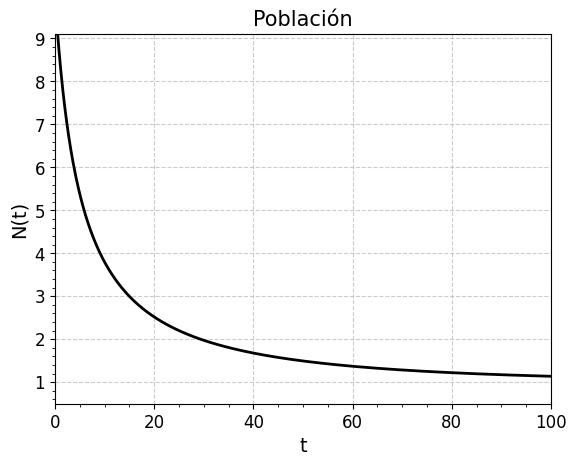

In [24]:
N0=10
K=1
r=0.02
t=np.arange(0,100,0.1)
N_poblacion=logistic_solution(t,r,K,N0)
plt.plot(t,N_poblacion,c='k',linewidth=2)
lineplot_setup(0,100,'t','N(t)',ymin=0.5,ymax=9.1,title='Población',legend=False)


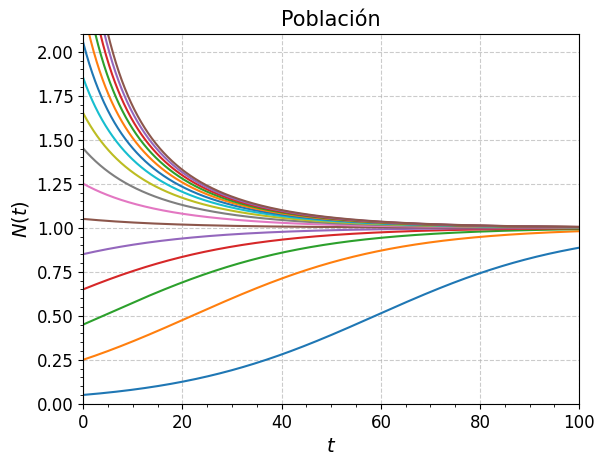

In [21]:
K=1
r=0.05
t=np.arange(0,100,0.1)
for N0 in np.arange(0.05,3.1,0.2):
    N_poblacion=logistic_solution(t,r,K,N0)
    plt.plot(t,N_poblacion,label=N0)
lineplot_setup(0,100,'$ t$','$N(t)$',ymin=0,ymax=2.1,title='Población',legend=False)


La ecuación logística se deriva de una simple ecuación diferencial ordinaria que describe cómo una población cambia con el tiempo, considerando tanto el crecimiento intrínseco de la población como la capacidad de carga del entorno. La forma básica de la ecuación logística se expresa como:

\begin{align}
\frac{dN}{dt}=r\,N\bigg(1-\frac{N}{K}\bigg)
\end{align}

donde:

- $N$ es la población en un momento dado,
- $t$ es el tiempo,
- $r$ es la tasa intrínseca de crecimiento de la población,
- $K$ es la capacidad de carga del entorno.

La ecuación logística describe cómo la tasa de cambio de la población ($\frac{dN}{dt}$) depende de la población actual ($N$). La primera parte $rN$ representa el crecimiento exponencial de la población en ausencia de limitaciones ambientales. La segunda parte $(1−\frac{N}{K})$ introduce la limitación de la población debido a la capacidad de carga ($K$), lo que significa que a medida que la población se acerca a $K$, el crecimiento se desacelera hasta alcanzar un equilibrio.

In [22]:
def logistic_equation(r, N,K):
    return r*N*(1-(N/K))
    

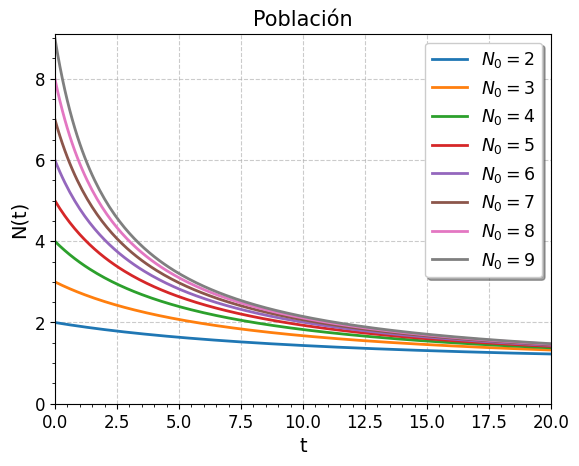

In [23]:
r=0.05
K=1
dt=0.1
t=np.arange(0,100,dt)
N=np.zeros_like(t)
for N0 in np.arange(2,10):
    Nval=N0
    for it,ti in enumerate(t):
        N[it]=Nval
        Nval=Nval+dt*logistic_equation(r,N[it],K)
    plt.plot(t,N,linewidth=2,label='$N_0=$'+str(N0))
lineplot_setup(0,20,'t','N(t)',ymin=0,ymax=9.1,title='Población',legend=True)


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 11 - Ecuación logística </font>**

<font color="DarkBlue"> 1. Resuelva la ecuación logística pero ahora utilizando una capacidad de carga de $50$ para una población inicial $N_0=100$, Utilice diferentes tasas de crecimiento, primero $r_1=0.5$  y $r_2=0.25$.
    
<font color="DarkBlue"> 2. Grafique sus resultados para la solución, utilizando líneas sólidas para las soluciones correspondientes a $r_1$ y líneas punteadas para las soluciones correspondientes a $r_2$ e interprete las diferencias con el ejemplo anterior. 
    
<font color="DarkBlue"> 3. Ahora utilice 5 valores de la tasa de crecimiento diferentes de manera que la población se ajuste con su capacidad de carga a los 2, 5, 10, 18 y 30 pasos de tiempo. Grafique, e interprete, sus resultados.
    
    
---

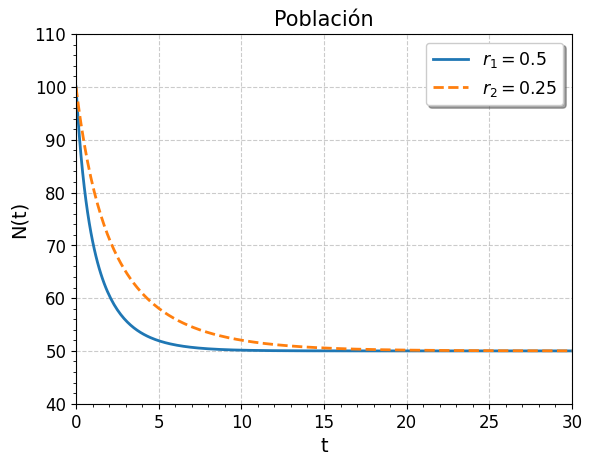

In [57]:
r1=0.5
r2=0.25
K=50
dt=0.1
t=np.arange(0,100,dt)
N=np.zeros_like(t)
N2=np.zeros_like(t)
N0=100
Nval=N0
Nval2=N0
for it,ti in enumerate(t):
    N[it]=Nval
    N2[it]=Nval2
    Nval=Nval+dt*logistic_equation(r1,N[it],K)
    Nval2=Nval2+dt*logistic_equation(r2,N2[it],K)
plt.plot(t,N,linewidth=2,label='$r_1=0.5$')
plt.plot(t,N2,linewidth=2,label='$r_2=0.25$',linestyle='--')
lineplot_setup(0,30,'t','N(t)',ymin=40,ymax=110,title='Población',legend=True)

### **<font color="ForestGreen">  El mapa logístico </font>**

El mapa logístico es un modelo matemático simple pero poderoso que se utiliza para estudiar el crecimiento de una población en un entorno limitado por recursos finitos. Fue propuesto por primera vez por el biólogo Robert May en la década de 1970 como un intento de entender los patrones complejos que pueden surgir en sistemas dinámicos no lineales.

Específicamente, este tipo de estudios buscaba entender si las poblaciones fluctúan determinísticamente únicamente por las variaciones en las condiciones ambientales. Por el contrario, era posible que tal vez la dinámica de poblaciones, no-lineal, tuviera factores imprevistos o no del todo deterministas. 

¿Cómo construir el mapa logístico?

1. **Inicialización:**
    Comenzamos con un valor inicial arbitrario para la población NN. Este valor puede ser cualquier número entre 0 y 1, que represente la proporción de la población máxima que puede existir en el sistema.

2. **Iteración:**
    Usando la ecuación del mapa logístico:
    $N[i+1]=r N_i(1−\frac{N}{K})$
    Iteramos la ecuación para calcular la población en el próximo período de tiempo ($N_{i+1}$). Repetimos este proceso para varios pasos de tiempo, calculando $N$ para cada iteración.

3.  **Variación de rr:**
    Manteniendo constante el valor inicial de $N$, variamos gradualmente el parámetro de tasa de crecimiento $r$ en un rango específico. Esto nos permite explorar cómo cambia el comportamiento del sistema a medida que ajustamos la tasa de crecimiento.

4.  **Observación de soluciones:**
    Para cada valor de $r$, observamos/guardamos en una variable cómo evoluciona la población $N$ a lo largo del tiempo. Podemos realizar esto para un número fijo de iteraciones o hasta que el sistema alcance un estado estable. Es crucial registrar las poblaciones observadas para cada valor de $r$.

5. **Gráfica**
    Una vez que hemos explorado una gama suficiente de valores de $r$ y hemos registrado las poblaciones correspondientes como resultado, podemos graficar los resultados. Comúnmente, se grafica $r$ en el eje horizontal y $N$ en el eje vertical. Esto nos permite visualizar cómo cambia la población en función de la tasa de crecimiento rr y detectar patrones emergentes, incluidos los puntos de bifurcación y la transición al caos.


En el siguiente ejemplo graficamos el mapa logístico para una capacidad de carga de 1, y un arreglo de tasas de crecimiento $r$ desde 2.5 hasta 4. 

Resolvemos la ecuación logística 100 veces, primero 100 veces en una condición transiente, es decir la resolvemos de juego 100 veces y con el valor final de este juego volvemos a iterar 100 veces (de a debis). Son estos resultados de la segunda iteración los que guardamos de cada iteración. En principio, para una misma $r$, $K$ y población inicial deberían salirnos los mismos resultados $N$, ¿cierto?

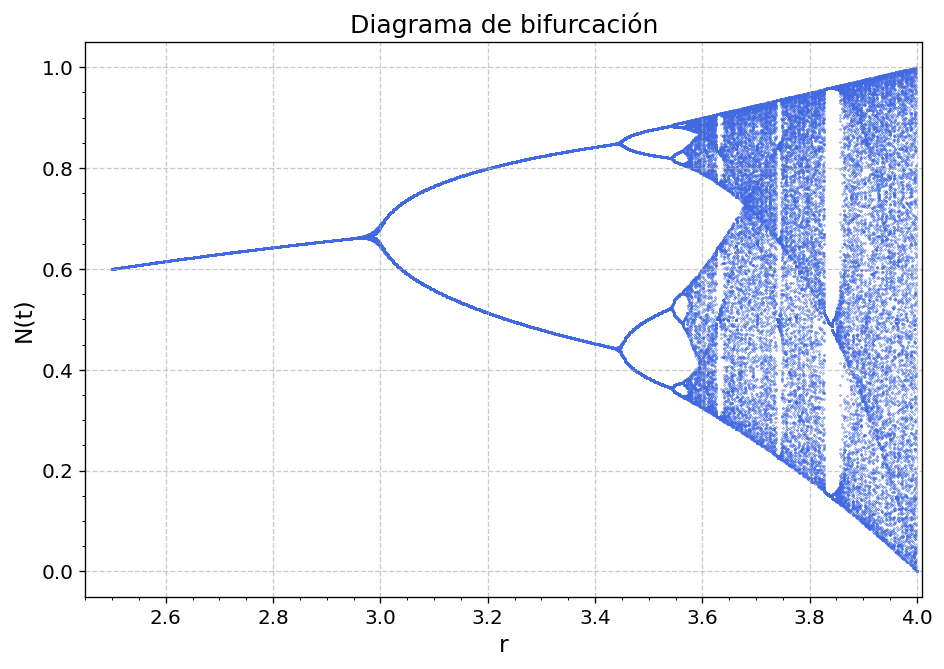

In [47]:
# Función para generar los datos de la bifurcación
def generate_bifurcation_data(r_values, iterations, transient):
    # lista vacia de resultados, va a tener pares de (r,N)
    bifurcation_data = []
    # parte crucial, iterar por los diferentes valores de r
    for r in r_values:
        N = 0.5  # Condición inicial arbitraria
        for _ in range(transient):
            N = logistic_equation(r, N, 1)  # Descartamos algunos puntos iniciales
        # luego si resolvemos la ecuacion para 100 iteraciones 
        for _ in range(iterations):
            N = logistic_equation(r, N, 1)
            bifurcation_data.append([r, N])

    return np.array(bifurcation_data)

# Parámetros
r_values = np.linspace(2.5, 4.0, 1000)  # Valores de r
iterations = 100 # Número de iteraciones por valor de r
transient = 100  # Iteraciones iniciales a descartar

# Generar datos de bifurcación
bifurcation_data = generate_bifurcation_data(r_values, iterations, transient)

# Graficar la bifurcación
plt.figure(figsize=(9, 6),dpi=120)
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.1, c='royalblue')
lineplot_setup(2.45,4.01,'r','N(t)',title='Diagrama de bifurcación')


La bifurcación es un fenómeno en el que el sistema cambia repentinamente su comportamiento dinámico a medida que un parámetro (en este caso, la tasa de crecimiento $r$) se ajusta gradualmente. En el contexto del mapa logístico, la bifurcación se refiere a cómo cambian las soluciones a medida que $r$ aumenta, el sistema puede experimentar bifurcaciones periódicas, donde la población oscila entre valores específicos de manera regular. Sin embargo, a valores más altos de $r$, el sistema puede entrar en un estado caótico, donde las oscilaciones de la población son impredecibles y **altamente sensibles a las condiciones iniciales**.

A medida que $r$ aumenta, el sistema puede experimentar bifurcaciones periódicas, donde la población oscila entre valores específicos de manera regular. Sin embargo, a valores más altos de $r$, el sistema puede entrar en un estado caótico, donde las oscilaciones de la población son impredecibles y altamente sensibles a las condiciones iniciales.

El estudio de las bifurcaciones en el mapa logístico y en sistemas dinámicos similares es importante porque proporciona una comprensión más profunda de cómo los sistemas naturales y sociales pueden exhibir comportamientos complejos y a menudo impredecibles a medida que cambian los parámetros que los gobiernan. Además, estos modelos pueden tener aplicaciones en una variedad de campos, desde la ecología hasta la economía y la física.


El estudio de las bifurcaciones en el mapa logístico y en sistemas dinámicos similares es importante porque proporciona una comprensión más profunda de cómo los sistemas naturales y sociales pueden exhibir comportamientos complejos y a menudo impredecibles a medida que cambian los parámetros que los gobiernan. Además, estos modelos pueden tener aplicaciones en una variedad de campos, desde la ecología hasta la economía y la física.
ones del sistema (en este caso, la población) a medida que $r$ varía.

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

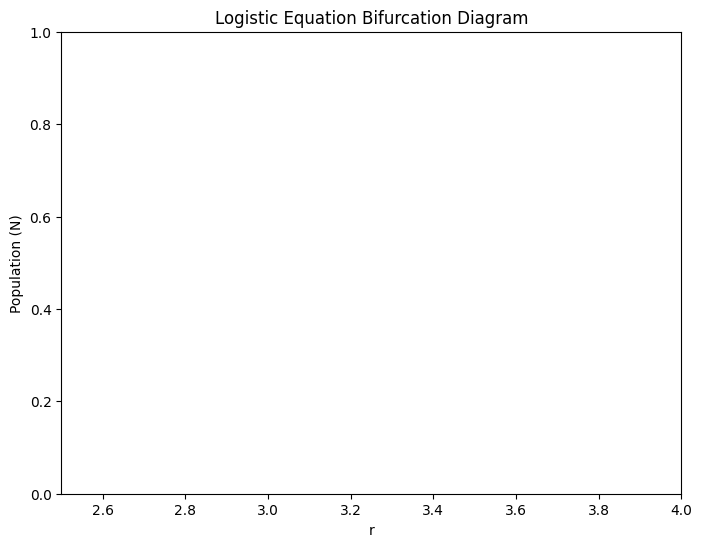

In [48]:
def update(frame):
    r = bifurcation_data[:frame, 0]
    N = bifurcation_data[:frame, 1]
    line.set_data(r, N)
    return line,
# Función de inicialización para la animación
def init():
    line.set_data([], [])
    return line,

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(2.5, 4.0)
ax.set_ylim(0, 1)
ax.set_xlabel('r')
ax.set_ylabel('Population (N)')
ax.set_title('Logistic Equation Bifurcation Diagram')

# Create empty line for animation
line, = ax.plot([], [],'mp', lw=0.15,markersize=0.1)

# Crear la animación
num_frames = len(bifurcation_data)
# Crear la animación
num_frames = 1050
ani = FuncAnimation(fig, update, frames=np.arange(0,len(bifurcation_data),10e2,dtype=np.int), interval=75,init_func=init, blit=True)

# Mostrar la animación en el notebook
from IPython.display import HTML
HTML(ani.to_jshtml())




En la animación simplemente vemos cómo hay valores críticos de $r$, por ejemplo $r=3$ donde la población puede tener números muy diferentes. En la práctica, esto quiere decir que el tamaño de las poblaciones no está completamente determinado sólo por los parámetros $r$ y $K$, sino que algo más está sucediendo. 